In [1]:
%matplotlib inline


In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib as mpl

# importing Dataset


In [3]:
dataset = pd.read_csv("Airplane_Crashes_Since_1908.csv")

In [4]:
dataset.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [5]:
dataset.count()

Date            5268
Time            3049
Location        5248
Operator        5250
Flight #        1069
Route           3562
Type            5241
Registration    4933
cn/In           4040
Aboard          5246
Fatalities      5256
Ground          5246
Summary         4878
dtype: int64

# Date field - String to date type

In [6]:
dataset['Date']= pd.to_datetime(dataset['Date'])

In [7]:
dataset.head(1)


,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."


# add new column year

In [8]:
dataset['Year']= dataset['Date'].dt.year
dataset['Survived']=dataset['Aboard']-dataset['Fatalities']

In [16]:
dataset.head(5)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year,Survived
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908,1.0
1,1912-07-12,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912,0.0
2,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913,0.0
3,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,1913,6.0
4,1913-10-17,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,1913,0.0


# yearly crashed plane, New table is created loc[row, column(array)]

In [10]:
yearly_crashed_plane= dataset.loc[:,['Year','Date']]


In [11]:
yearly_crashed_plane.tail()

,Year,Date
5263,2009,2009-05-20
5264,2009,2009-05-26
5265,2009,2009-06-01
5266,2009,2009-06-07
5267,2009,2009-06-08


In [12]:
yearly_crashed = yearly_crashed_plane.groupby(['Year']).count()

In [13]:
yearly_crashed.head()

,Date
Year,
1908,1
1912,1
1913,3
1915,2
1916,5


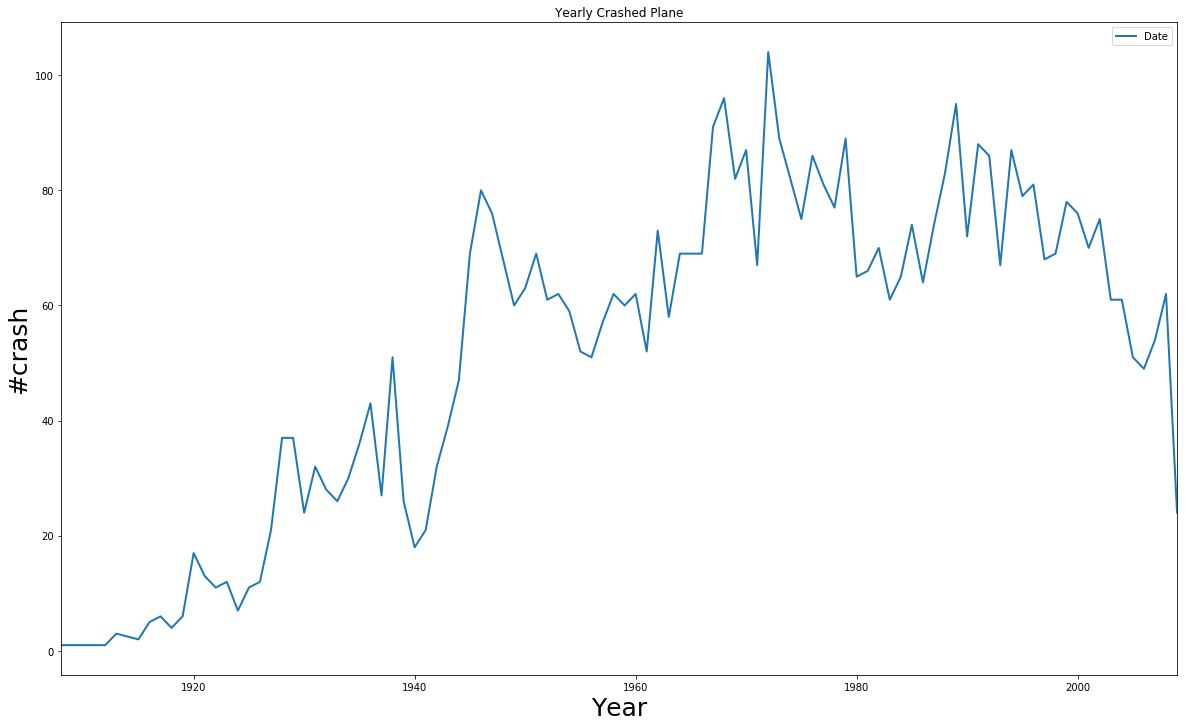

In [14]:
plot1= yearly_crashed.plot(lw=2, title= 'Yearly Crashed Plane', figsize=(20,12))
plot1.set_xlabel('Year', fontsize=25)
plot1.set_ylabel('#crash', fontsize=25)

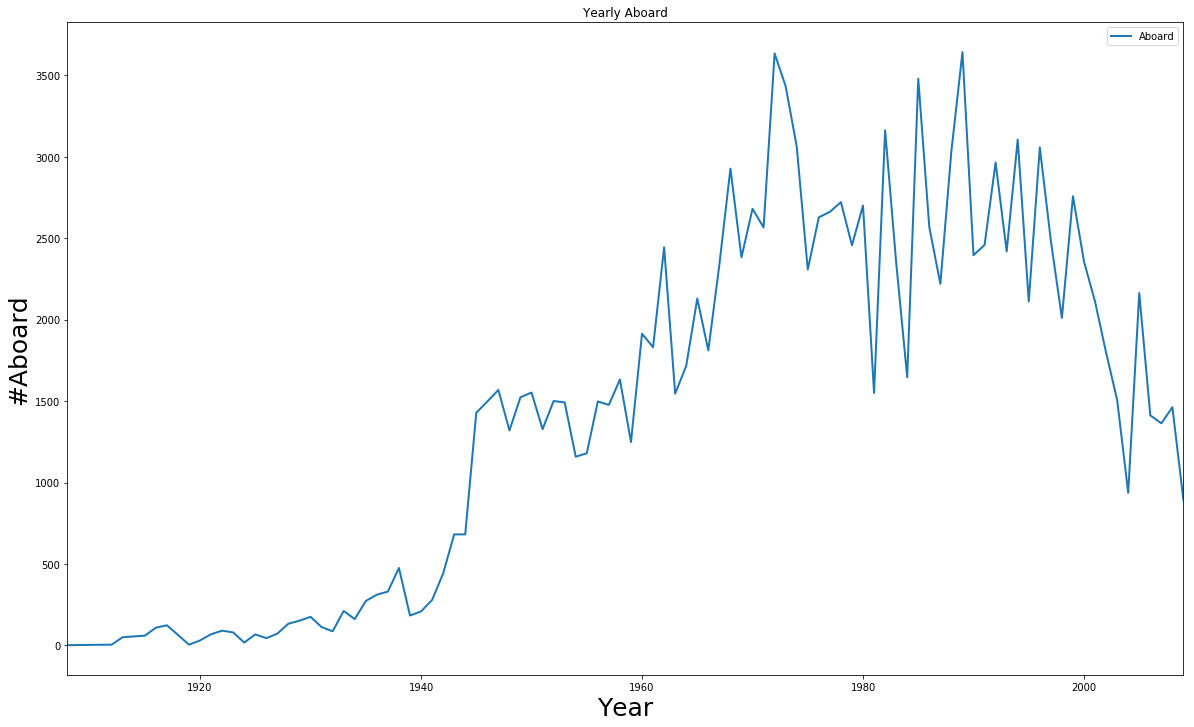

In [18]:
yearly_Aboard= dataset.loc[:,['Year','Aboard']].groupby('Year').sum()
plot2= yearly_Aboard.plot(lw=2, title= 'Yearly Aboard', figsize=(20,12))
plot2.set_xlabel('Year', fontsize=25)
plot2.set_ylabel('#Aboard', fontsize=25)

In [20]:
yearly_Aboad.head()

,Aboard
Year,
1908,2.0
1912,5.0
1913,51.0
1915,60.0
1916,109.0


# Yearly Stats for Aboard, Fatalities and Survive

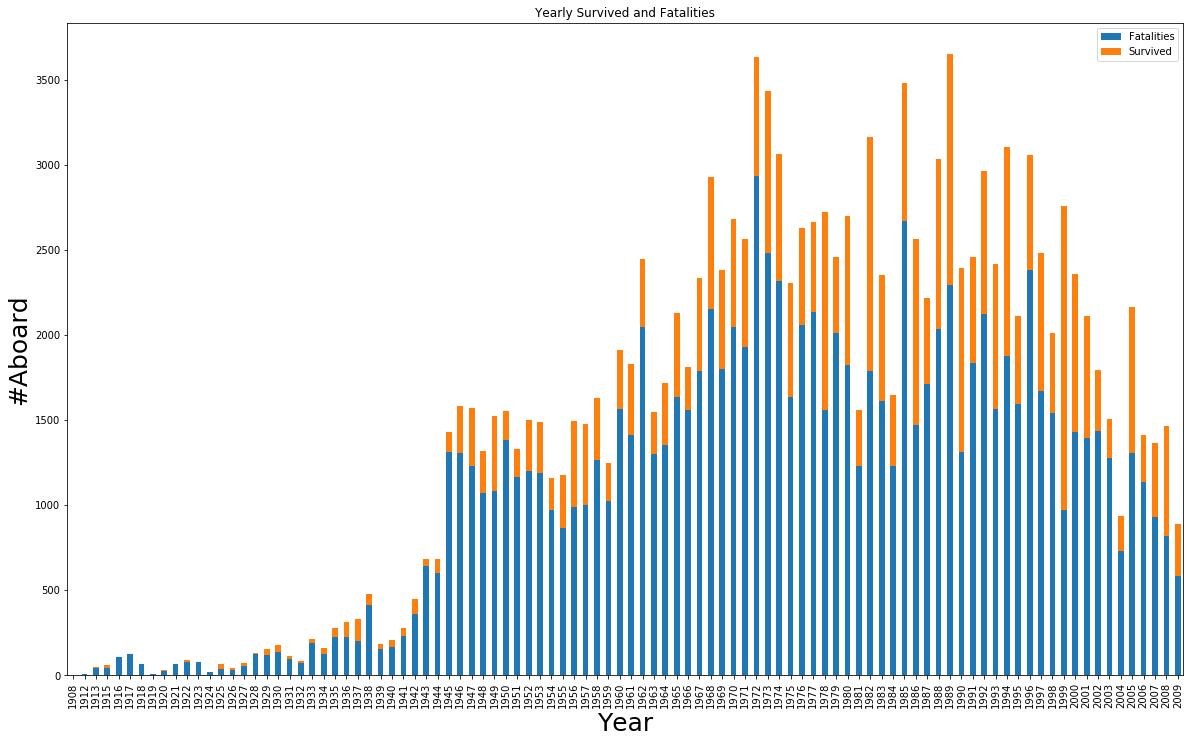

In [21]:
yearlystat= dataset.loc[:, ['Year', 'Fatalities', 'Survived']].groupby('Year').sum()
plot3= yearlystat.plot.bar(stacked=True, title= 'Yearly Survived and Fatalities', figsize=(20,12))
plot3.set_xlabel('Year', fontsize=25)
plot3.set_ylabel('#Aboard', fontsize=25)


# Airplane crashed by Operator

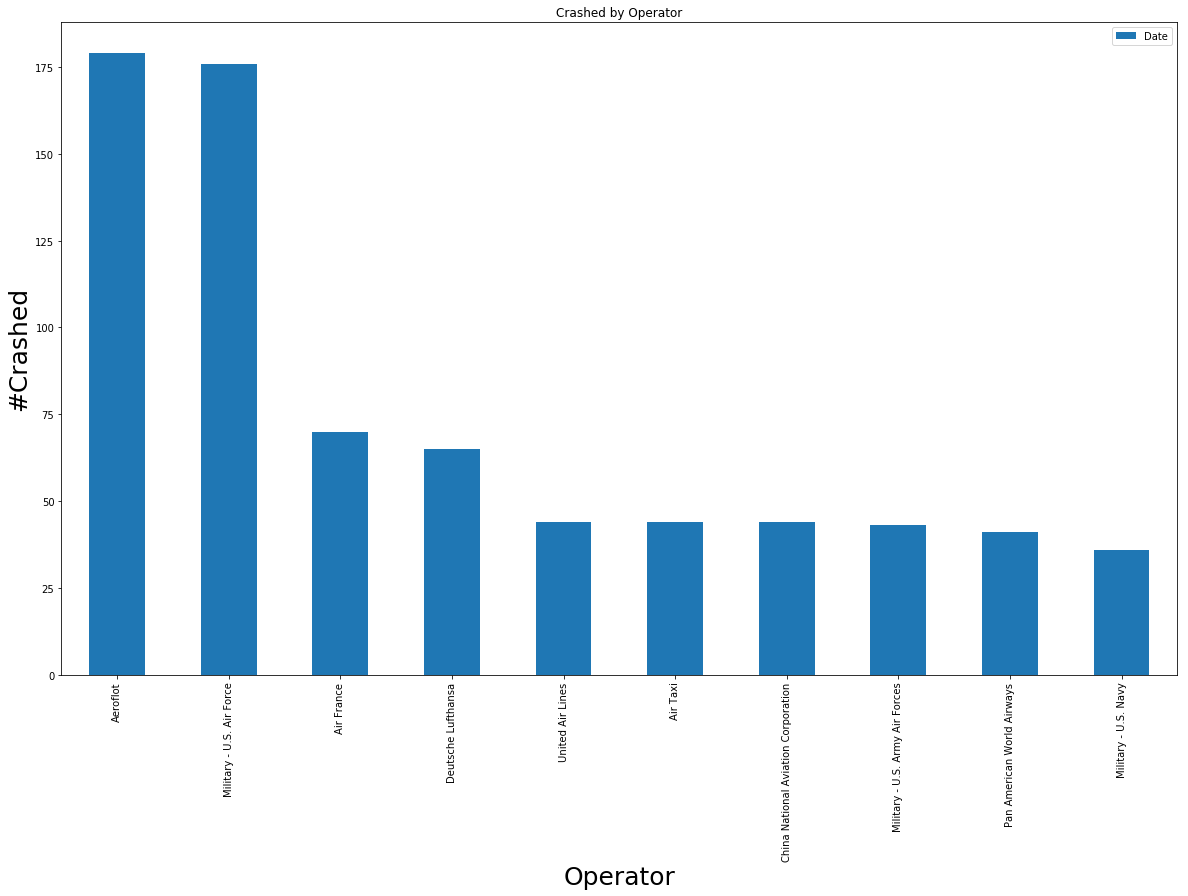

In [22]:
crashed_by_operator= dataset.loc[:,['Operator','Date']].groupby('Operator').count()
crashed_by_operator=crashed_by_operator.sort_values(by="Date", ascending=False).head(10)
plot4= crashed_by_operator.plot.bar( title= 'Crashed by Operator', figsize=(20,12))
plot4.set_xlabel('Operator', fontsize=25)
plot4.set_ylabel('#Crashed', fontsize=25)


# Crashed by Type

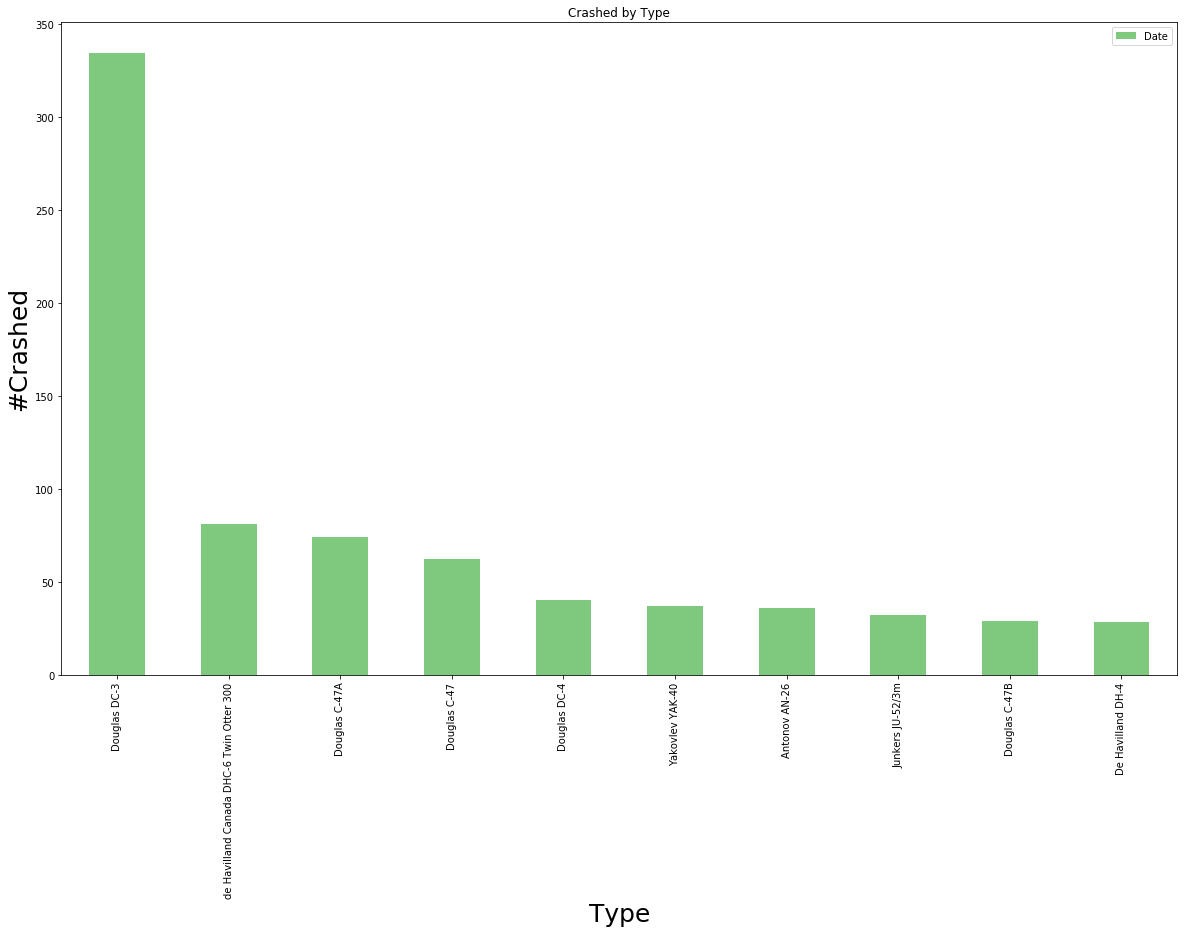

In [24]:
crashed_by_type= dataset.loc[:,['Type','Date']].groupby('Type').count()
crashed_by_type=crashed_by_type.sort_values(by="Date", ascending=False).head(10)
plot5= crashed_by_type.plot.bar( colormap="Accent",title= 'Crashed by Type', figsize=(20,12))
plot5.set_xlabel('Type', fontsize=25)
plot5.set_ylabel('#Crashed', fontsize=25)


In [26]:
crashed_by_type

,Date
Type,
Douglas DC-3,334
de Havilland Canada DHC-6 Twin Otter 300,81
Douglas C-47A,74
Douglas C-47,62
Douglas DC-4,40
Yakovlev YAK-40,37
Antonov AN-26,36
Junkers JU-52/3m,32
Douglas C-47B,29


# create a text file and select 200 random summary and analyze

In [24]:
import random
text = list(dataset['Summary'])
length= len(text)
with open('random_summary.txt', "w") as f:
    for x in range(200):
        n= random.randint(0,length-1)
        f.write(str(text[n]))
        f.write("\n")

In [25]:
import textblob
stringText=textblob.TextBlob(str(list(dataset["Summary"]))).lower()
words = stringText.words

In [26]:
wordCount= {}
ignore = ['a', 'an', 'the','and','to','of','in','into','is','was','on','at','from','with','while','for',"'s",
          'as','not','by','after', 'during']

for word in words:
    if word in ignore:
        continue
    if word in wordCount:
        wordCount[word]=wordCount[word]+1
    else:
        wordCount[word]=1

In [27]:
import operator
sorted_word = sorted(wordCount.items(), key=operator.itemgetter(1), reverse=True)[:500]
with open('sorted-word-count.txt', "w") as f:
    f.write(str(sorted_word))

In [28]:
reasons = ['weather', 'fire', 'shot down', 'stall/runway', 'pilot/crew error', 'system failure']

In [29]:
expression = ['((poor|bad).*(weather|visibility)|thunderstorm|fog)','(caught fire)|(caught on fire)',
              '(shot down)|(terrorist)|(terrorism)','(stall)|(runway)','(pilot|crew) (error|fatigue)',
             '(engine.*(fire|fail))|(structural fail)|(fuel leak)|(langing gear)|(turbulence)|(electrical)|(out of fuel)']

In [30]:
dataset["Label"] = pd.Series(np.nan, index=dataset.index)
dataset.head(2)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year,Survived,Label
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908,1.0,NaN
1,1912-07-12,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912,0.0,NaN


In [31]:
trainData= []
for x in range(len(dataset)):
    if dataset.loc[x, 'Summary'] is np.nan:
        dataset.loc[x,"Label"] = "Unknown" 
    else:
        for y in range(len(expression)):
            if  re.search(expression[y], dataset.loc[x, "Summary"].lower()):
                dataset.loc[x, "Label"]=reasons[y]
                temp= dataset.loc[x,"Summary"].lower(), dataset.loc[x,"Label"]
                trainData.append(temp)
                break

In [32]:
len(trainData)

2222

In [33]:
dataset.head()


,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year,Survived,Label
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908,1.0,NaN
1,1912-07-12,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912,0.0,NaN
2,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913,0.0,NaN
3,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,1913,6.0,weather
4,1913-10-17,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,1913,0.0,NaN


# Build naive bayes Classifier

In [34]:
from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(trainData)

# Classify rest of the Dataset

In [35]:
reasons.append("Unknown")
for x in range(len(dataset)):
    if dataset.loc[x,"Label"] in reasons:
        continue
    else:
        dataset.loc[x,"label"] = cl.classify(dataset.loc[x,"Summary"])
        
dataset.to_csv("Airplane_updated.csv")
#dataset = pd.read_csv["Airplane_updated"] 


array([<matplotlib.axes._subplots.AxesSubplot object at 0x112af00b8>], dtype=object)

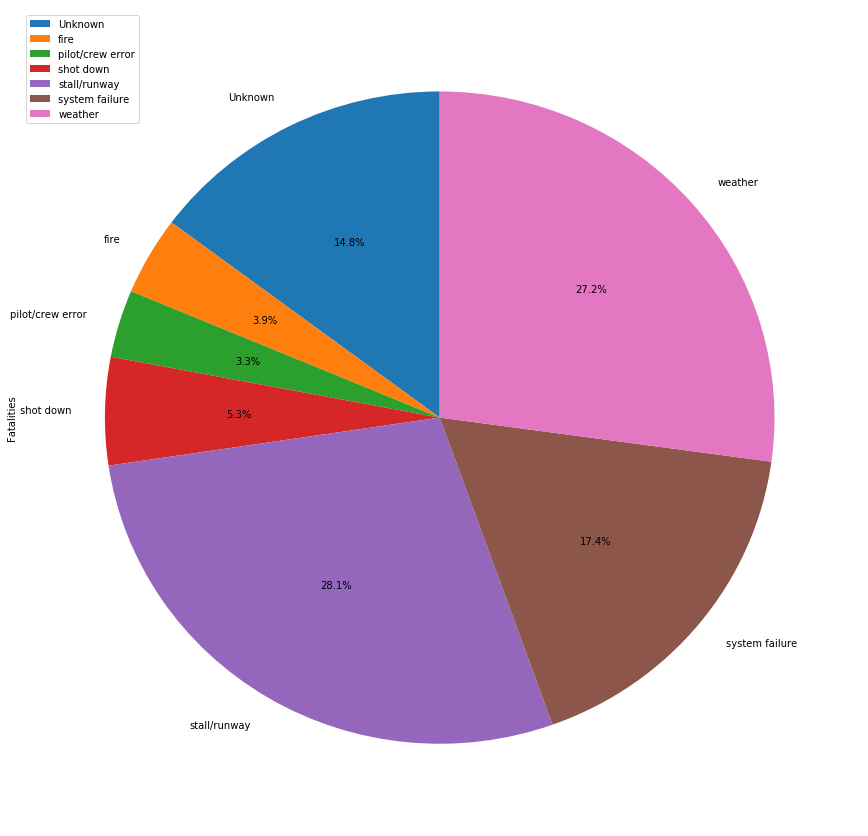

In [37]:
label = dataset.loc[:,["Fatalities","Label"]].groupby("Label").count()
label.plot.pie(subplots=True, autopct='%1.1f%%', shadow=False, startangle=90, fontsize=10, figsize=(15, 15))